In [14]:
!pip install -q pandas>1.0.3

In [15]:
!pip install -q statsmodels


In [16]:
import sys
!{sys.executable} -m pip install -q scikit-learn==0.23.1
#!pip install -q scikit-learn < 0.23.1

C:\Users\jagad\Anaconda3\envs\time_series_forecasting\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


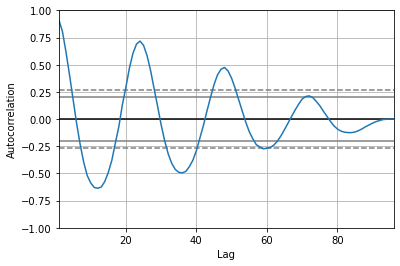

In [17]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('sales.csv', index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

In [18]:
# from pandas import read_csv
# from pandas import datetime
# from pandas import DataFrame
# from statsmodels.tsa.arima_model import ARIMA
# from matplotlib import pyplot

# # def parser(x):
# # 	return datetime.strptime('190'+x, '%Y-%m')

# series = read_csv('sales.csv', index_col=0, squeeze=True)
# # fit model
# model = ARIMA(series, order=(15,1,0))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())
# # plot residual errors
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
# print(residuals.describe())

In [19]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

series = read_csv('sales.csv', index_col=0, squeeze=True)
print(series.head())

Purchase Date
2020-05-05 00:00:00    201
2020-05-05 01:00:00    186
2020-05-05 02:00:00    101
2020-05-05 03:00:00     70
2020-05-05 04:00:00     54
Name: Sales, dtype: int64


C:\Users\jagad\Anaconda3\envs\time_series_forecasting\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [20]:
series.tail()

Purchase Date
2020-05-08 19:00:00    373
2020-05-08 20:00:00    392
2020-05-08 21:00:00    339
2020-05-08 22:00:00    329
2020-05-08 23:00:00    251
Name: Sales, dtype: int64

In [21]:
predicted_series = read_csv('predicted_sales.csv', index_col=0, squeeze=True)
print(predicted_series.head())

Purchase Date
2020-05-09 00:00:00    149
2020-05-09 01:00:00    127
2020-05-09 02:00:00    132
2020-05-09 03:00:00     81
2020-05-09 04:00:00     51
Name: Sales, dtype: int64


In [22]:

#print(series.index)
X = series.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
history = [x for x in X]


In [23]:
Y = predicted_series.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
test = [x for x in Y]


In [24]:

# predictions = list()
# for t in range(len(test)):
# 	model = ARIMA(history, order=(15,1,0))
# 	model_fit = model.fit(disp=0)
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.3f' % error)
# # plot
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [33]:

predictions = list()
model = ARIMA(history, order=(24,2,0))
model_fit = model.fit(disp=0)
predictions = model_fit.forecast(steps=24)[0]
predictions
# for t in range(len(test)):
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))


C:\Users\jagad\Anaconda3\envs\time_series_forecasting\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jagad\Anaconda3\envs\time_series_forecasting\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jagad\Anaconda3\envs\time_series_forecasting\lib\site-packages\statsmodels\tsa\arima_model.py:1866: RuntimeWarning: invalid value encountered in sqrt
  fcerr = np.sqrt(np.cumsum(cumsum_n(ma_rep, self.k_diff) ** 2) * sigma2)


array([248.96730927, 153.48850925, 124.94569906,  81.46047846,
        39.70015069,  44.40747658,  60.61611727, 137.68044372,
       208.56324667, 268.61029318, 333.70663619, 340.5939337 ,
       385.03404423, 383.98368728, 394.33359402, 415.46953178,
       374.77435217, 390.9735417 , 350.45057962, 359.56609251,
       335.39852876, 313.68654485, 287.81901978, 227.014104  ])

Test MSE: 1871.704


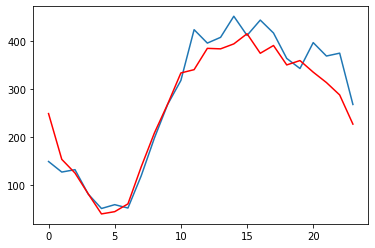

In [34]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()